In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score

In [9]:
df = pd.read_csv("cleaned_train.csv")

In [10]:
X = df.drop(columns=["Credit_Score"]) 
y = df["Credit_Score"] 

# Split the dataset into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
#Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)


=================== MODEL EVALUATION ===================
Model Accuracy: 0.6435
Precision: 0.6721
Recall: 0.6435
ROC-AUC Score: 0.7990576337180447


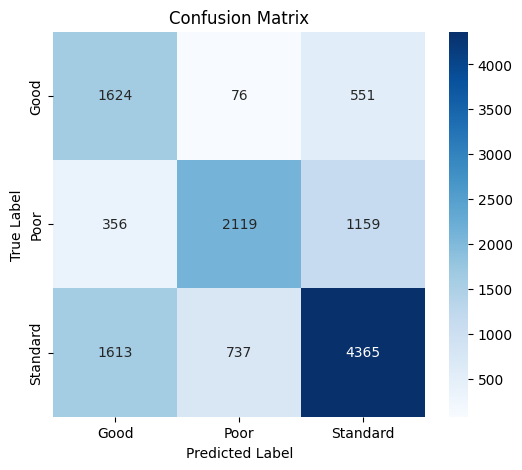

In [12]:
# Make predictions
y_pred = dt_model.predict(X_val)
y_proba = dt_model.predict_proba(X_val) if hasattr(dt_model, "predict_proba") else None

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
precision = precision_score(y_val, y_pred, average="weighted", zero_division=0)
recall = recall_score(y_val, y_pred, average="weighted", zero_division=0)
roc_auc = roc_auc_score(y_val, y_proba, multi_class="ovr") if y_proba is not None else "N/A"

# Map class labels dynamically
class_names = {0: "Good", 1: "Poor", 2: "Standard"} 
y_pred_named = [class_names[label] for label in y_pred]
y_val_named = [class_names[label] for label in y_val]


print("\n=================== MODEL EVALUATION ===================")
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names.values(), yticklabels=class_names.values())

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

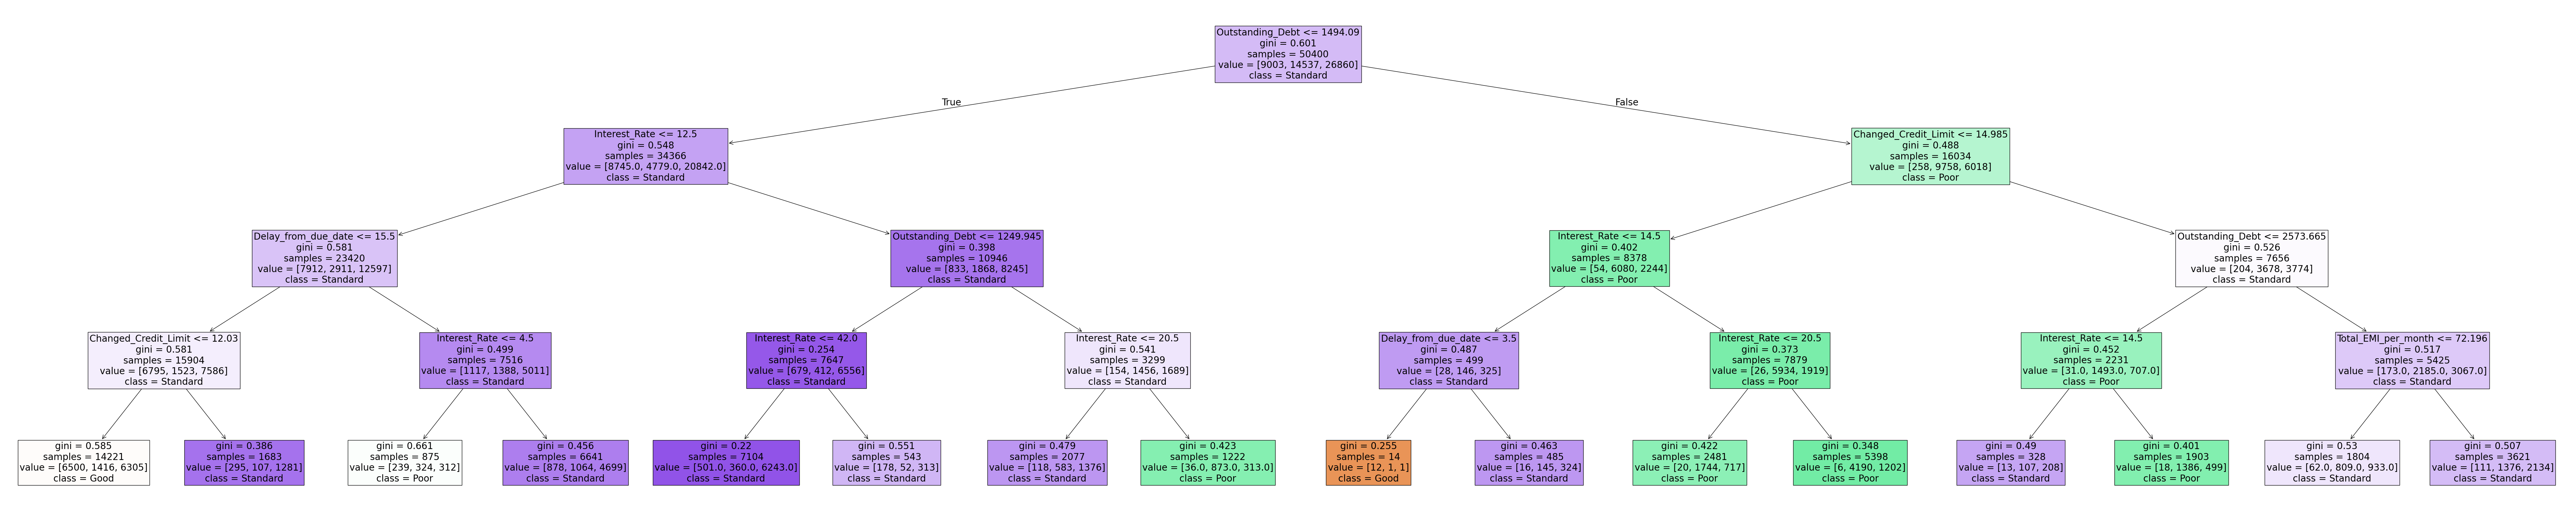

In [13]:
class_mapping = {0: "Good", 1: "Poor", 2: "Standard"}

class_names = [class_mapping[i] for i in sorted(class_mapping.keys())]

plt.figure(figsize=(100, 20))
plot_tree(
    dt_model, 
    feature_names=X.columns, 
    class_names=class_mapping,
    filled=True, 
    fontsize=20, 
)
plt.show()